In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from scipy import stats

pd.set_option('display.max_columns', None)

df = pd.read_csv("/content/Employee Data.csv")   # change if needed
df.head()


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [3]:
# basic info
df.info()

# stats
df.describe(include='all')

# unique values & length
for col in df.columns:
    print(col, ":", df[col].nunique(), "unique values")
    print(df[col].unique())
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB
Company : 6 unique values
['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']

Age : 29 unique values
[20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]

Salary : 40 unique values
[  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098

In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.head()

,company,age,salary,place,country,gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [6]:
df.isnull().sum()
df['age'] = df['age'].replace(0, np.nan)
df = df.drop_duplicates()
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
z = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))
df_out = df[(z < 3).all(axis=1)]

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())


Data Analysis

In [8]:
filtered = df[(df['age'] > 40) & (df['salary'] < 5000)]
filtered

,company,age,salary,place,country,gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


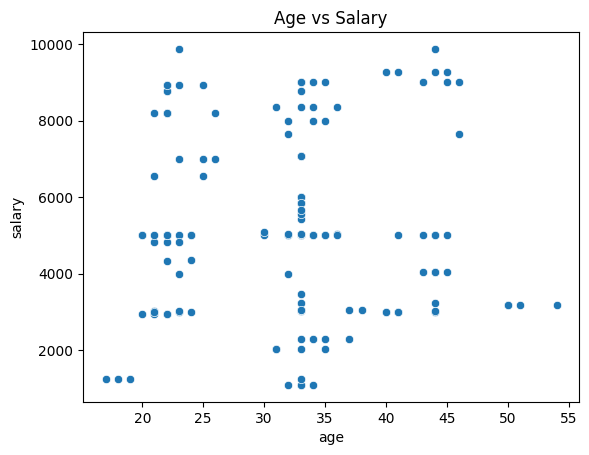

In [9]:
#Plot Age vs Salary
sns.scatterplot(data=df, x='age', y='salary')
plt.title("Age vs Salary")
plt.show()

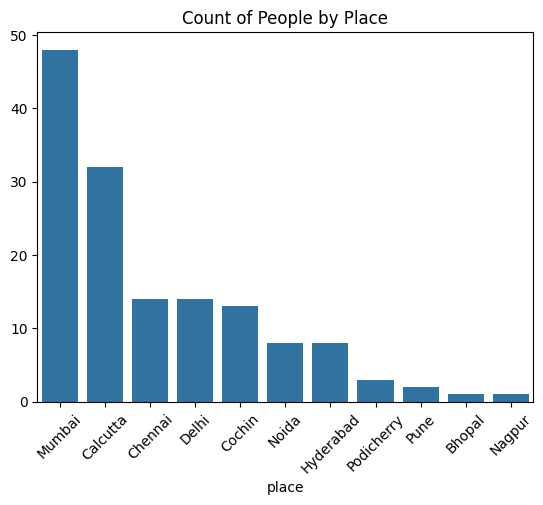

In [10]:
#People count by place
place_count = df['place'].value_counts()
sns.barplot(x=place_count.index, y=place_count.values)
plt.xticks(rotation=45)
plt.title("Count of People by Place")
plt.show()

In [14]:
le = LabelEncoder()

cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df_encoded = pd.get_dummies(df, drop_first=True)

In [15]:
scaler_std = StandardScaler()
scaler_mm = MinMaxScaler()

scaled_std = scaler_std.fit_transform(df_encoded)
scaled_mm = scaler_mm.fit_transform(df_encoded)

df_std = pd.DataFrame(scaled_std, columns=df_encoded.columns)
df_mm = pd.DataFrame(scaled_mm, columns=df_encoded.columns)

## Summary

- Performed EDA and explored unique values and statistics
- Cleaned the dataset by fixing missing values, removing duplicates and invalid age entries
- Detected and treated outliers
- Filtered and visualized key relationships (Age vs Salary and People by Place)
- Encoded categorical features into numeric form
- Scaled the data using StandardScaler and MinMaxScaler
- Final dataset is ready for machine learning applications
